# K-Nearest Neighbors (KNN)

**K-Nearest Neighbors (KNN)** is a supervised machine learning algorithm used for **classification** and **regression** that predicts the class label or value of a new data point by identifying the *k* closest data points in the training dataset and applying **majority voting** (for classification) or **averaging** (for regression).

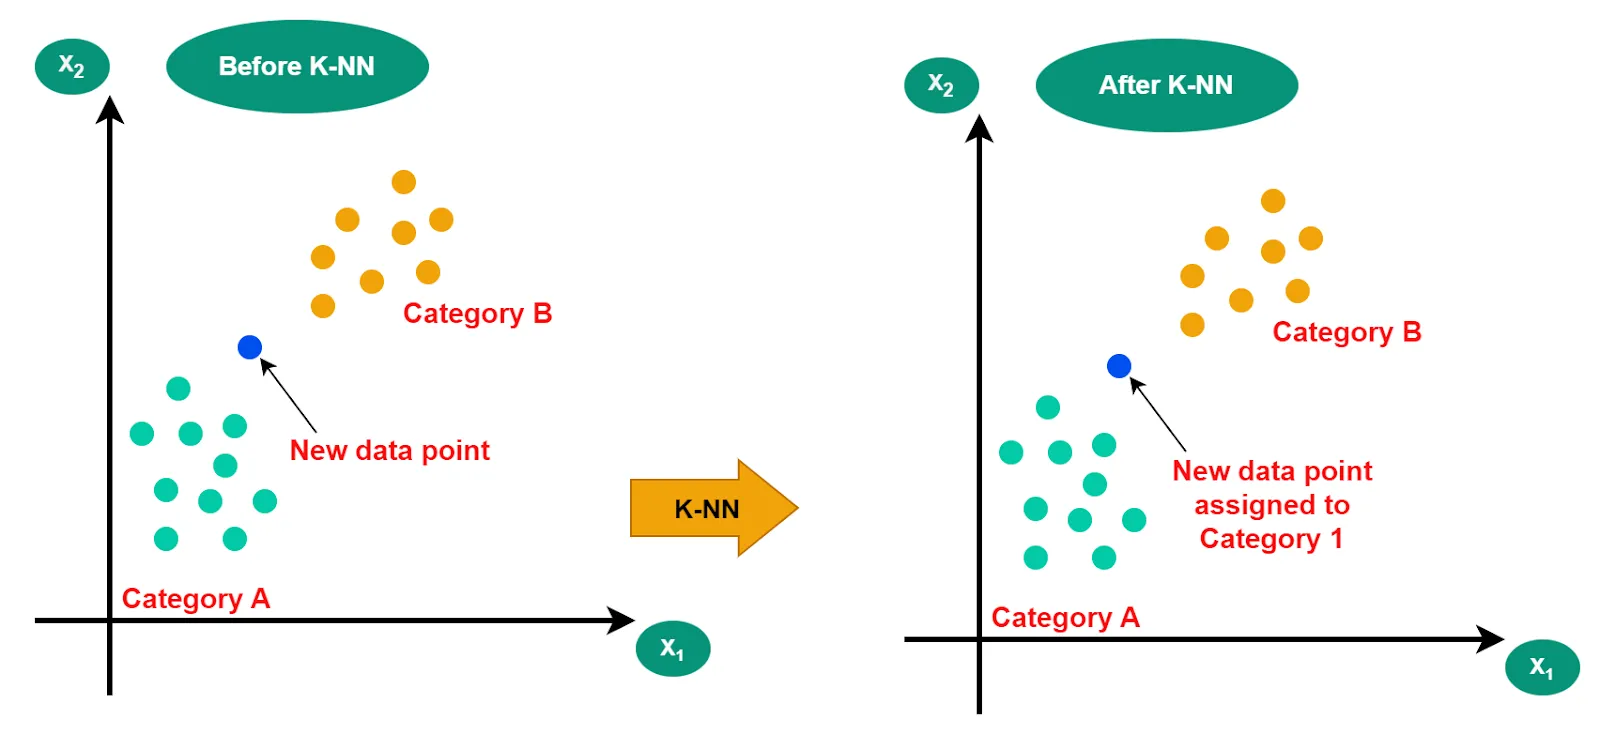

## Algorithm Steps

**Step 1:** Select the number of neighbors, **k**.

**Step 2:** Calculate the distance between the **query (new) data point** and all other points in the training dataset using a chosen distance metric.

**Step 3:** Sort the distances in ascending order and select the **top k nearest neighbors**.

**Step 4:** Make a prediction:

   - **For classification**: Assign the query point to the class that occurs most frequently among its k nearest neighbors (majority voting).
   - **For regression**: Predict the value of the query point as the **average** of the values of its k nearest neighbors.

## Types of Distance Metrics

Distance metrics determine how the similarity between data points is measured in KNN.

### 1. Euclidean Distance

- Euclidean distance is the **straight-line (shortest) distance** between two points in Euclidean space.
- It is the **most commonly used distance metric** in KNN.

<table>
<tr>
<td style="width:50%; text-align:center;">

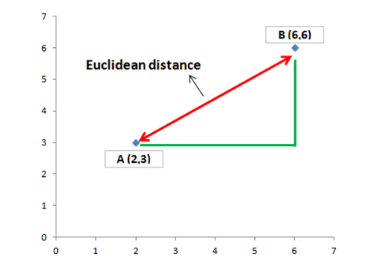
</td>
<td style="width:50%;">

$$
\begin{aligned}
d
&= \sqrt{(x_2 - x_1)^2 + (y_2 - y_1)^2}
\end{aligned}
$$

</td>
</tr>
</table>



### 2. Manhattan Distance
- Manhattan distance measures the distance between two points as the **sum of the absolute differences** of their coordinates.
- It represents movement along **grid-like paths**, similar to navigating **city blocks**.

<table>
<tr>
<td style="width:50%; text-align:center;">

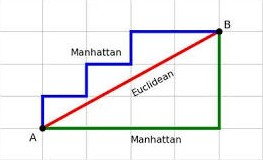
</td>
<td style="width:50%;">

$$
\begin{aligned}
d
&= |x_2 - x_1| + |y_2 - y_1|
\end{aligned}
$$

</td>
</tr>
</table>

### 3. Minkowski Distance

- Minkowski distance is a **generalized distance measure** used for vector data.
- It is a generalized form of both **Euclidean** and **Manhattan** distances.

The Minkowski distance is given by:

$$
\begin{aligned}
d
&= \left( |x_2 - x_1|^p + |y_2 - y_1|^p \right)^{\frac{1}{p}}
\end{aligned}
$$

The distance value is always **non-negative**.

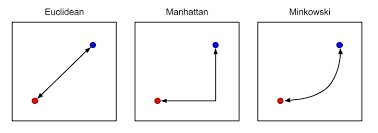

- If \( p = 1 \), Minkowski distance becomes **Manhattan distance**
- If \( p = 2 \), Minkowski distance becomes **Euclidean distance**

## Example: KNN Classification Using Euclidean Distance

### Step 1: Collect the Dataset

| x | y | Class |
|---|---|-------|
| 1 | 2 | Red   |
| 2 | 3 | Red   |
| 3 | 3 | Blue  |
| 6 | 5 | Blue  |
| 7 | 6 | Blue  |

New data point to be classified:

$$
\begin{aligned}
(x_{\text{new}}, y_{\text{new}})
&= (3, 2)
\end{aligned}
$$


### Step 2: Select the Number of Neighbors

$$
\begin{aligned}
k
&= 3 \quad \text{(3 nearest neighbors)}
\end{aligned}
$$


### Step 3: Calculate Euclidean Distance

Euclidean distance formula:

$$
\begin{aligned}
d
&= \sqrt{(x_{\text{new}} - x_i)^2 + (y_{\text{new}} - y_i)^2}
\end{aligned}
$$

#### Distance Calculations

**1. Point (1, 2) → Red**

$$
\begin{aligned}
d
&= \sqrt{(3 - 1)^2 + (2 - 2)^2} \\
&= \sqrt{4} \\
&= 2
\end{aligned}
$$

**2. Point (2, 3) → Red**

$$
\begin{aligned}
d
&= \sqrt{(3 - 2)^2 + (2 - 3)^2} \\
&= \sqrt{1 + 1} \\
&= \sqrt{2} \\
&\approx 1.41
\end{aligned}
$$

**3. Point (3, 3) → Blue**

$$
\begin{aligned}
d
&= \sqrt{(3 - 3)^2 + (2 - 3)^2} \\
&= \sqrt{1} \\
&= 1
\end{aligned}
$$

**4. Point (6, 5) → Blue**

$$
\begin{aligned}
d
&= \sqrt{(3 - 6)^2 + (2 - 5)^2} \\
&= \sqrt{9 + 9} \\
&= \sqrt{18} \\
&\approx 4.24
\end{aligned}
$$

**5. Point (7, 6) → Blue**

$$
\begin{aligned}
d
&= \sqrt{(3 - 7)^2 + (2 - 6)^2} \\
&= \sqrt{16 + 16} \\
&= \sqrt{32} \\
&\approx 5.66
\end{aligned}
$$

### Step 4: Sort the Distances in Ascending Order

After computing the distances, we sort them in ascending order.

| Point | Distance | Class |
|------|----------|-------|
| (3, 3) | 1.00 | Blue |
| (2, 3) | 1.41 | Red  |
| (1, 2) | 2.00 | Red  |
| (6, 5) | 4.24 | Blue |
| (7, 6) | 5.66 | Blue |


### Step 5: Majority Voting

Count the class labels among the selected neighbors:

- **Red** → 2
- **Blue** → 1

$$
\begin{aligned}
\text{Predicted class}
&= \text{Red} \quad \text{(majority label)}
\end{aligned}
$$


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [2]:
data = {
    "X": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 2, 5],
    "Y": [2, 3, 3, 4, 5, 5, 6, 7, 8, 9, 1, 4],
    "Color": ["Red", "Red", "Blue", "Red", "Blue", "Blue", "Blue", "Red", "Blue", "Blue", "Red", "Red"]
}

df = pd.DataFrame(data)
df

,X,Y,Color
0,1,2,Red
1,2,3,Red
2,3,3,Blue
3,4,4,Red
4,5,5,Blue
5,6,5,Blue
6,7,6,Blue
7,8,7,Red
8,9,8,Blue
9,10,9,Blue


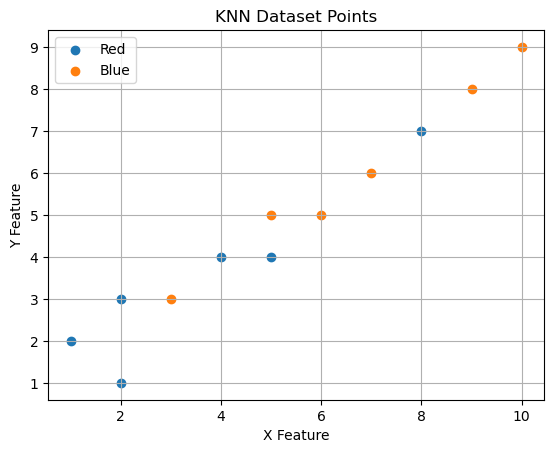

In [3]:
plt.scatter (df[df["Color"]=="Red"]["X"], df[df["Color"]=="Red"]["Y"], label="Red")
plt.scatter(df[df["Color"]=="Blue"] ["X"], df[df["Color"]=="Blue"] ["Y"], label="Blue")
plt.xlabel("X Feature")
plt.ylabel("Y Feature")
plt.title("KNN Dataset Points")
plt.legend()
plt.grid(True)
plt.show()

In [4]:
X = df[["X", "Y"]]
y = df["Color"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print("Training data size:", len(X_train))
print("Testing data size:", len(X_test))

Training data size: 9
Testing data size: 3


In [6]:
knn = KNeighborsClassifier(n_neighbors = 3, metric="euclidean")
knn.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [8]:
y_pred = knn.predict(X_test)

print("Actual labels:", list(y_test))
print("Predicted labels:", list(y_pred))

Actual labels: ['Red', 'Blue', 'Red']
Predicted labels: ['Red', 'Blue', 'Red']


In [9]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [10]:
new_point = [[3,2]]
new_prediction = knn.predict(new_point)

print("New Data Point:", new_point[0])
print("Predicted Color:", new_prediction [0])

New Data Point: [3, 2]
Predicted Color: Red


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


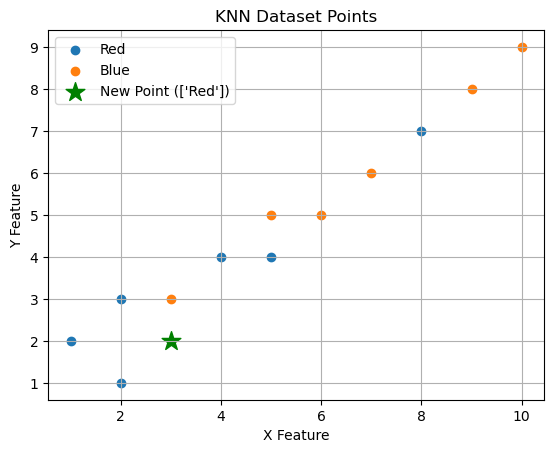

In [11]:
plt.scatter(df[df["Color"]=="Red"]["X"], df[df["Color"]=="Red"]["Y"], label="Red")
plt.scatter(df[df["Color"]=="Blue"]["X"], df[df["Color"]=="Blue"]["Y"], label="Blue")
plt.scatter(new_point[0][0], new_point[0][1], color="green", marker="*", s = 200, label=f"New Point ({new_prediction})")
plt.xlabel("X Feature")
plt.ylabel("Y Feature")
plt.title("KNN Dataset Points")
plt.legend()
plt.grid(True)
plt.show()